<a href="https://colab.research.google.com/github/SidU/LLMs-from-scratch/blob/main/DotProductIntuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Dot Product in Simple Terms

The goal of this notebook is to build an intuitive understanding of the dot product, how it works, and why it’s useful—especially in applications like attention mechanisms in AI.

---


## What is the Dot Product?

The dot product is a way to measure **similarity** between two vectors. It calculates how much the vectors align with each other.

For two vectors A and B with components:

$$
A = [A_1, A_2, \dots , A_n]
$$

$$
B = [B_1, B_2, \dots , B_n]
$$

The dot product is computed as:

$$
A \cdot B = A_1 B_1 + A_2 B_2 + \dots + A_n B_n
$$

### Intuition:

- If the dot product is **positive**, the vectors point in similar directions.
- If it's **zero**, the vectors are perpendicular (unrelated).
- If it's **negative**, the vectors are pointing in opposite directions.


In [1]:
import numpy as np

# Define two vectors
A = np.array([1, 2])
B = np.array([3, 4])

# Compute dot product manually
dot_product = A[0] * B[0] + A[1] * B[1]

# Using numpy's dot product function
dot_product_numpy = np.dot(A, B)

print("Manual Dot Product:", dot_product)
print("Numpy Dot Product:", dot_product_numpy)

Manual Dot Product: 11
Numpy Dot Product: 11


## Geometric Interpretation of the Dot Product

The dot product can also be written as:

$$
A \cdot B = |A| |B| \cos(\theta)
$$

Where:

- $ |A| $ and $ |B| $ are the magnitudes (lengths) of the vectors.
- $ \theta $ is the angle between them.
- The term **$cos(\theta)$** measures how aligned the vectors are.

### Intuition:

- If $ \theta = 0 $ degrees (same direction), $ \cos(\theta) = 1 $ → Maximum alignment.
- If $ \theta = 90 $ degrees (perpendicular), $ \cos(\theta) = 0 $ → No alignment.
- If $ \theta = 180 $ degrees (opposite), $ \cos(\theta) = -1 $ → Maximum misalignment.


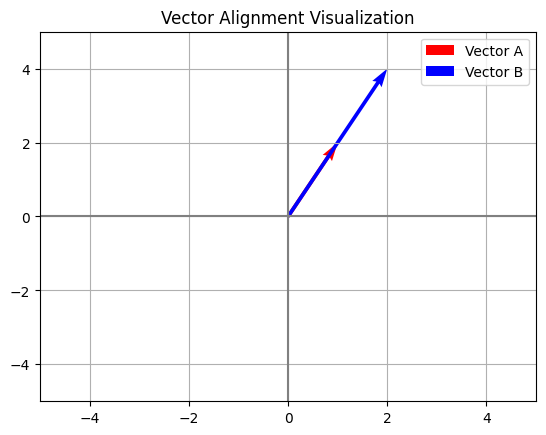

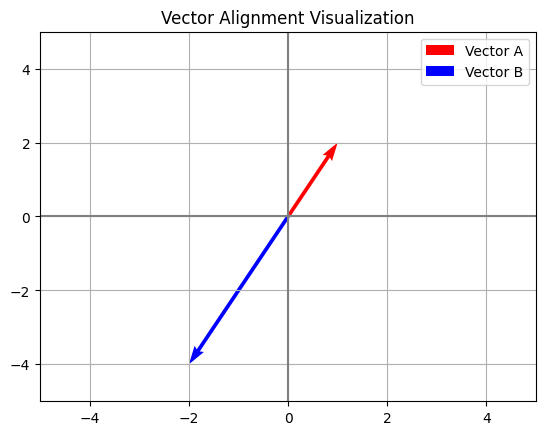

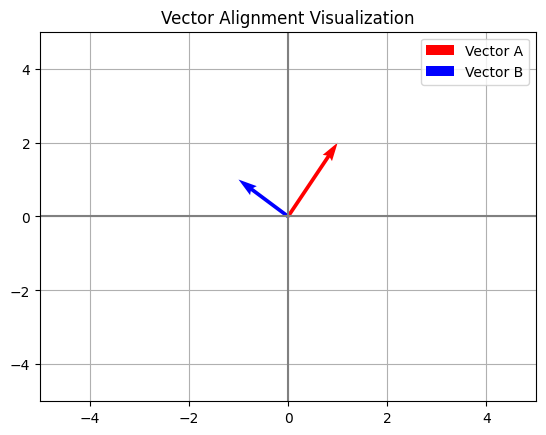

In [2]:
import matplotlib.pyplot as plt

def plot_vectors(v1, v2):
    plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label="Vector A")
    plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label="Vector B")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.grid()
    plt.legend()
    plt.title("Vector Alignment Visualization")
    plt.show()

A = np.array([1, 2])
B = np.array([2, 4])  # Aligned
plot_vectors(A, B)

C = np.array([-2, -4])  # Opposite direction
plot_vectors(A, C)

D = np.array([-1, 1])  # Perpendicular
plot_vectors(A, D)


## Cosine Similarity and Normalized Dot Product

If we normalize the vectors, the dot product simplifies to:

$$
\cos(\theta) = \frac{A \cdot B}{|A||B|}
$$

This gives us a value between -1 and 1, which tells us the direction alignment without considering vector magnitudes.

- `cos(θ) ≈ 1` → Vectors are similar.
- `cos(θ) ≈ 0` → Vectors are unrelated.
- `cos(θ) ≈ -1` → Vectors are opposite.


In [3]:
def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return dot_product / (norm_A * norm_B)

A = np.array([1, 2])
B = np.array([2, 4])  # Similar
C = np.array([-2, -4])  # Opposite
D = np.array([-1, 1])  # Perpendicular

print("Cosine Similarity (A, B):", cosine_similarity(A, B))
print("Cosine Similarity (A, C):", cosine_similarity(A, C))
print("Cosine Similarity (A, D):", cosine_similarity(A, D))


Cosine Similarity (A, B): 0.9999999999999998
Cosine Similarity (A, C): -0.9999999999999998
Cosine Similarity (A, D): 0.31622776601683794


## Why is the Dot Product Useful in Attention?

In deep learning, attention mechanisms rely on the dot product to compare **queries** (what we're looking for) and **keys** (available information). The dot product allows the model to:

1. Quickly measure **alignment** between words in text.
2. Identify which words should receive more **focus**.
3. Compute relationships efficiently in high-dimensional space.

Example:

- In the phrase **"The cat sat on the mat"**,
  - The model calculates the dot product between words like "cat" and "sat" to understand their connection.
  - Higher dot product → higher attention.


In [4]:
# Simulating attention scores using dot product
query = np.array([0.5, 0.5])
key_1 = np.array([0.6, 0.6])  # Related
key_2 = np.array([0.1, 0.9])  # Less related

attn_score_1 = np.dot(query, key_1)
attn_score_2 = np.dot(query, key_2)

print("Attention Score (Query, Key 1):", attn_score_1)
print("Attention Score (Query, Key 2):", attn_score_2)


Attention Score (Query, Key 1): 0.6
Attention Score (Query, Key 2): 0.5


## Summary and Key Takeaways

1. The dot product is a simple yet powerful tool for measuring **vector similarity**.
2. It measures how aligned two vectors are based on their elements.
3. The geometric interpretation tells us about the **direction** and relationship.
4. In machine learning, attention mechanisms use dot products to determine the relevance of different tokens in a sequence.
